In [2]:
import sys
sys.path.append('../..')

import pyotc

PyOTC loaded.
Software version is: 0.3.1


/usr/local/lib/python3.4/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
basename = 'B01_'
directory = '../exampleData/height_calibration_single_psds/'

hc = pyotc.HeightCalibration()
hc.load_hc_data(basename, directory=directory)


[[Fit Statistics]]
    # function evals   = 83
    # data points      = 35
    # variables        = 8
    chi-square         = 0.001
    reduced chi-square = 0.000
[[Variables]]
    U:             0.04114181 +/- 0.002146 (5.22%) (init= 0.148575)
    focal_shift:   0.67598542 +/- 0.006858 (1.01%) (init= 0.8)
    h0:            0.56267854 +/- 0.005382 (0.96%) (init= 0.64)
    p0:            0.45183632 +/- 0.010157 (2.25%) (init= 0.340411)
    p1:           -0.23647335 +/- 0.035961 (15.21%) (init= 0.01)
    p2:            0.14903089 +/- 0.036887 (24.75%) (init= 0.01)
    p3:           -0.03245199 +/- 0.011371 (35.04%) (init= 0.001)
    tau:           2.11686618 +/- 0.485570 (22.94%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(p1, p3)                    =  0.950 
    C(p0, p2)                    =  0.910 
    C(focal_shift, h0)           =  0.650 
    C(h0, p1)                    =  0.496 
    C(h0, p3)                    =  0.401 
    C(focal_shift, p1)        

<IPython.core.display.Javascript object>


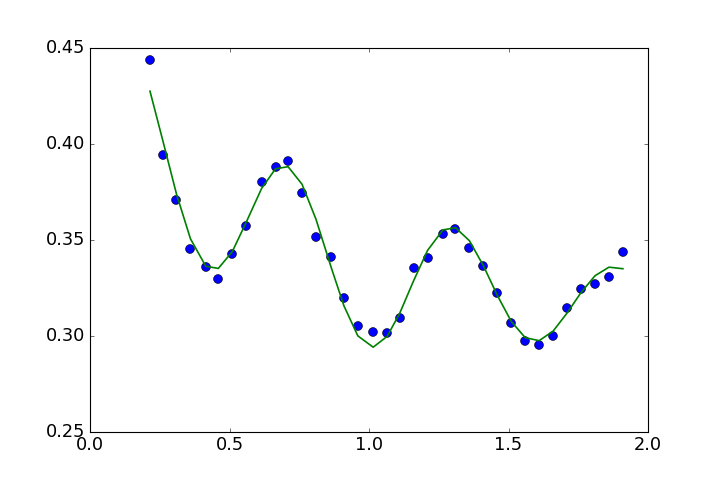

Focal shift = 0.676 +/- 0.007


In [12]:
###  get focal shift

from pyotc.focal_shift import get_focal_shift, fs_fun

hc.exclude_heights_outside(0.2, 10)
heights = hc.get_heights(unit='um', name='z')
signal = hc.get_dissens('z')

wl = hc.wavelength
ref_ind = hc.ref_ind

minimizer = get_focal_shift(heights, signal, wl, ref_ind,
                            height_unit='um', wavelength_unit='nm',
                            report_focal_shift=True, verbose=1)